In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sp
import scipy.stats as ss
import scipy as sc

# Proof of stake and decentrality

## Share of coins owned by each peer through simulation

Let $p$ be the number of peers and $N_x$ the number of coins of owned by peer $x\in\{1,\ldots, p\}$ at time $n=0$ and $N = \sum_x N_x$ the total number of coins.

We define the processes $(Y_n)_{n\geq0}$ and  $(Z_n)_{n\geq0}$ as the number and proportion of balls of each color at time $n\geq0$.

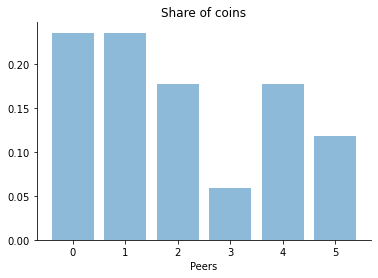

In [2]:
# Initialization of the process
p = 6
peers = np.arange(0,p,1)
N_x = np.random.randint(low = 1, high = 5, size = p)
N, Y_0 = sum(N_x), N_x
Z_0 = Y_0 / sum(Y_0)
plt.bar(peers, Z_0, width=0.8, alpha = 0.5)
plt.xticks(peers)
plt.xlabel('Peers')
plt.title('Share of coins')
sns.despine()

The process $(Z_n)$ is a martingale and is therefore stable on average. When $r=1$ then it converges toward a Dirichlet distribution of parameter $N_x,\text{ }x=1,\ldots, p$. The $i^{th}$ component of $Z_n = (Z_n^1,\ldots, Z_n^p)$ then converges toward a Beta distribution of parameter $(N_i, N - N_i)$. 

We sample $1,000$ realizations of $Z_{100}$

In [3]:
Z_100 = []
for l in range(1000):
    Y_n, Z_n = [Y_0], [Z_0]
    for k in range(100):
        # Vector of reward
        R = np.zeros(p)
        # Reward all equal to 0 except for that selected peer
        R[np.random.choice(peers, 1, p=Z_n[-1])[0]] = 1
        Y_n.append(Y_n[-1] + R)
        Z_n.append(Y_n[-1] / sum(Y_n[-1]))
    Z_100.append(Z_n[-1])

We then draw the histograms for each component of $Z_n$ to compare them with the pdf of the beta distribution.

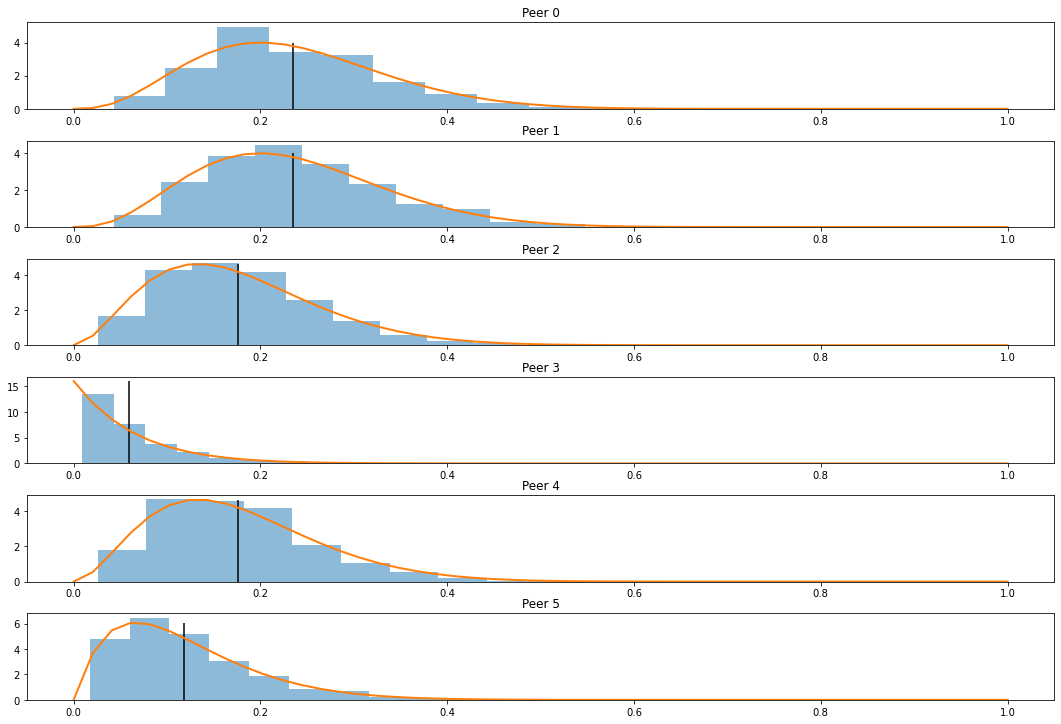

In [5]:
# print(np.mean(Z_100, 0)-Z_0)
# np.mean(Z_100, 0)
fig, ax = plt.subplots(len(peers), 1, figsize=(15,10))
fig.tight_layout()
for peer in peers:
    ax[peer].hist(np.matrix(Z_100)[:,peer], density=True, alpha = 0.5)
    x = np.linspace(0,1)
    y = ss.beta(Y_0[peer],sum(Y_0) - Y_0[peer]).pdf(x)
    ax[peer].plot(x, y , lw=2)
    ax[peer].vlines(Z_0[peer], ymin = 0, ymax = max(y), color = "black")
    ax[peer].title.set_text("Peer " + str(peer))

## Measuring decentrality

We can measure decentrality by calculating the expected Shannon entropy of the resulting distribution of coins among the peers. The best situation corresponds to a uniform distribution among the peers and an entropy of 

$$
\ln(p)
$$

The vector $Z_n$ converges toward a Dirichlet distribution with parameter $N_x\text{, }x = 1,\ldots, p$  whose entropy is given by 

$$
-\sum_x\frac{N}{N_x}\left[\psi(N_x+1)-\psi(N+1)\right]
$$

where $\psi$ is the digamma function. [scipy.special.digamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.digamma.html)


On average and upon stationarity, the entropy of the network is 1.5768074246015424 to be compared with 1.791759469228055


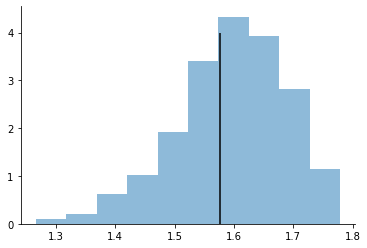

In [6]:
print("On average and upon stationarity, the entropy of the network is "
      + str(-sum(N_x/N*(sp.psi(N_x + 1) - sp.psi(N + 1)))) +
      " to be compared with "+
      str( np.log(p))
         )

emp_entropy = [-sum(Z_100[k] * np.log(Z_100[k])) for k in range(len(Z_100))]
plt.hist(emp_entropy, alpha = 0.5, density = True)
plt.vlines(-sum(N_x/N*(sp.psi(N_x + 1) - sp.psi(N + 1))), ymin = 0, ymax = 4, color = "black")
sns.despine()